### <b> Ensemble Learning </b>

### <b> Learning Objectives </b>
By the end of this lesson, you will be able to:
- Define ensemble learning
- List different types of ensemble methods
- Build an intuition
- Apply different algorithms of ensemble learning using use cases

### <b> What Is Ensemble Learning? </b>

Ensemble techniques combine individual models to improve the stability and predictive power of the model.

#### <b> Ideology Behind Ensemble Learning: </b>

* Certain models do well in modeling one aspect of the data, while others do well in modeling another.

* Instead of learning a single complex model, learn several simple models and combine their output to produce the final decision.

* Individual model variances and biases are balanced by the strength of other models in ensemble learning.

* Ensemble learning will provide a composite prediction where the final accuracy is better than the accuracy of individual models.

#### <b> Working of Ensemble Learning </b>

![Ensemble_Learning_Workflow](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Applied_Machine_Learning/Images/Lesson_07_Ensemble_Learning/Ensemble_Learning_Workflow.png)

#### <b> Significance of Ensemble Learning </b>

* Robustness
  - Ensemble models incorporate the predictions from all the base learners
* Accuracy
  - Ensemble models deliver accurate predictions and have improved performances

#### <b> Ensemble Learning Methods </b>

* Techniques for creating an ensemble model
* Combine all weak learners to form an ensemble, or create an ensemble of well-chosen strong and diverse models

#### <b> Steps Involved in Ensemble Methods </b>

Every ensemble algorithm consists of two steps:

* Producing a cohort of predictions using simple ML algorithms
* Combining the predictions into one aggregated model

The ensemble can be achieved through several techniques.

### <b> Types of Ensemble Methods </b>

#### <b> Averaging </b>


![Averaging](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Applied_Machine_Learning/Images/Lesson_07_Ensemble_Learning/Averaging.png)

#### <b> Weighted Averaging </b>

![Weighted_Averaging](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Applied_Machine_Learning/Images/Lesson_07_Ensemble_Learning/Weighted_Averaging.png)

### <b> Bagging Algorithms </b>

Bootstrap Aggregation or bagging involves taking multiple samples from your training dataset (with replacement) and training a model for each sample.

The final output prediction is averaged across the predictions of all of the submodels.

The three bagging models covered in this section are as follows:

 - Bagged Decision Trees
 - Random Forest
 - Extra Trees

#### <b> 1. Bagged Decision Trees </b>

Bagging performs best with algorithms that have a high variance. A popular example is decision trees, often constructed without pruning.

Below, you can see an example of using the BaggingClassifier with the Classification and Regression Trees algorithm (DecisionTreeClassifier). A total of 100 trees are created.


- Scikit-learn is a Python library that provides a consistent interface for machine learning and statistical modeling, including classification, regression, clustering, and dimensionality reduction.
- Pandas is a Python library for data manipulation and analysis.

In [5]:
#Bagged Decision Trees for Classification
import pandas
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [6]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)

In [7]:
dataframe.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
array = dataframe.values

X = array[:,0:8]
Y = array[:,8]

In [9]:
seed = 7

kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
cart = DecisionTreeClassifier()
num_trees = 100

model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
# base_estimator is the weak learner to fit to the model


results = model_selection.cross_val_score(model, X, Y, cv=kfold)
# cross validation score is a helper function to help score enseble models
# the CV attribute defines how we split/test the model (here kfold --> K-Fold cross-validation)
print(results.mean())

0.7578263841421736


In [8]:
model.fit(X,Y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=10)

In [7]:
seed = 10

kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
cart = DecisionTreeClassifier()
num_trees = 100

model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)

results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7473000683526999


In [6]:
results

array([0.76623377, 0.75324675, 0.74025974, 0.77922078, 0.80519481,
       0.79220779, 0.66233766, 0.75324675, 0.78947368, 0.73684211])

#### <b> 2. Random Forest </b> 

Random forest is an extension of bagged decision trees.

Samples of the training dataset are taken with replacement, but the trees are constructed in a way that reduces the correlation between individual classifiers. Specifically, rather than greedily choosing the best split point in the construction of the tree, only a random subset of features is considered for each split.

You can construct a Random Forest model for classification using the RandomForestClassifier class.

The example below provides a sample of Random Forest for classification with 100 trees and split points chosen from a random selection of three features.



In [9]:
#Random Forest Classification
import pandas
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfModel=RandomForestClassifier(max_features=3)

In [ ]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values

X = array[:,0:8]
Y = array[:,8]
seed = 7
num_trees = 100
max_features = 3

kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7721975393028024


#### <b> 3. Extra Trees</b>

Extra Trees are another modification of bagging where random trees are constructed from samples of the training dataset.

You can construct an Extra Trees model for classification using the ExtraTreesClassifier class.

The example below provides a demonstration of extra trees with a tree set of 100 and splits chosen from seven random features.



In [10]:
#Extra Trees Classification
import pandas
from sklearn import model_selection
from sklearn.ensemble import ExtraTreesClassifier
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
seed = 7
num_trees = 100
max_features = 7
x_train,x_test,y_train,y_test = model_selection.train_test_split(X,Y, random_state=seed, shuffle=True)

In [11]:
model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)

In [12]:
model.fit(x_train,y_train)

ExtraTreesClassifier(max_features=7)

In [13]:
model.score(x_train,y_train)

1.0

In [14]:
model.score(x_test,y_test)

0.7916666666666666

###  <b> Boosting Algorithms </b>

Boosting ensemble algorithms create a sequence of models that attempts to correct the mistakes of the models before them in the sequence.

Once created, the models make predictions that may be weighted by their demonstrated accuracy, and the results are combined to create a final output prediction.


The two most common boosting ensemble machine learning algorithms are:

- AdaBoost

- Stochastic Gradient Boosting
<br>

#### <b> AdaBoost </b>

AdaBoost was the first successful boosting ensemble algorithm. It generally works by weighting instances in the dataset by how easy or difficult they are to classify, allowing the algorithm to pay more or less attention to them in the construction of subsequent models.


![AdaBoost](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Applied_Machine_Learning/Images/Lesson_07_Ensemble_Learning/AdaBoost.png)

You can construct an AdaBoost model for classification using the AdaBoostClassifier class.

The example below demonstrates the construction of 30 decision trees in sequence using the AdaBoost algorithm.


In [31]:
#AdaBoost Classification
import pandas
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

seed = 7
num_trees = 30

x_train,x_test,y_train,y_test = model_selection.train_test_split(X,Y, random_state=seed, shuffle=True)
model = AdaBoostClassifier(n_estimators=500, random_state=seed,learning_rate=0.01)

model.fit(x_train,y_train)

from sklearn.metrics import classification_report

trainPred=model.predict(x_train)
testPred=model.predict(x_test)

print(classification_report(y_train,trainPred))

print(classification_report(y_test,testPred))

0.7552802460697198


#### <b> Stochastic Gradient Boosting </b>

One of the most advanced ensemble approaches is Stochastic Gradient Boosting (also known as Gradient Boosting Machines). It's also a strategy that's proven to be one of the most effective methods for boosting performance via ensemble.

#### <b> Steps of Gradient Boasting Machine </b>

![GBM_Steps](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Applied_Machine_Learning/Images/Lesson_07_Ensemble_Learning/GBM_Steps.PNG)

You can construct a Gradient Boosting model for classification using the **GradientBoostingClassifier** class.

The example below demonstrates Stochastic Gradient Boosting for classification with 100 trees.


In [10]:
#Stochastic Gradient Boosting Classification
import pandas
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)

array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
seed = 7
num_trees = 100

x_train,x_test,y_train,y_test = model_selection.train_test_split(X,Y, random_state=seed, shuffle=True)
model = GradientBoostingClassifier(n_estimators=500, random_state=seed)

model.fit(x_train,y_train)

from sklearn.metrics import classification_report

trainPred=model.predict(x_train)
testPred=model.predict(x_test)

print(classification_report(y_train,trainPred))

print(classification_report(y_test,testPred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       378
         1.0       1.00      1.00      1.00       198

    accuracy                           1.00       576
   macro avg       1.00      1.00      1.00       576
weighted avg       1.00      1.00      1.00       576

              precision    recall  f1-score   support

         0.0       0.76      0.85      0.81       122
         1.0       0.68      0.54      0.60        70

    accuracy                           0.74       192
   macro avg       0.72      0.70      0.70       192
weighted avg       0.73      0.74      0.73       192



In [43]:
# fine Tuning Gradient Boost Model
model = GradientBoostingClassifier(n_estimators=50, random_state=seed,min_samples_split=20,max_depth=5,min_samples_leaf=10,learning_rate=0.1)

model.fit(x_train,y_train)

from sklearn.metrics import classification_report

trainPred=model.predict(x_train)
testPred=model.predict(x_test)

print(classification_report(y_train,trainPred))

print(classification_report(y_test,testPred))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       378
         1.0       0.97      0.93      0.95       198

    accuracy                           0.97       576
   macro avg       0.97      0.96      0.96       576
weighted avg       0.97      0.97      0.97       576

              precision    recall  f1-score   support

         0.0       0.80      0.86      0.83       122
         1.0       0.72      0.61      0.66        70

    accuracy                           0.77       192
   macro avg       0.76      0.74      0.74       192
weighted avg       0.77      0.77      0.77       192



### CatBoost

CatBoost is an algorithm for gradient boosting on decision trees. It is developed by Yandex researchers and engineers and is used for search, recommendation systems, personal assistants, self-driving cars, weather prediction, and many other tasks at Yandex and in other companies, including CERN, Cloudflare, Careem taxi. It is open-source and can be used by anyone.

Let's study this with the help of a use case.


#### <b> Data Description </b>
The data consists of real historical data collected from 2010 & 2011. Employees are manually allowed or denied access to resources over time. You must create an algorithm capable of learning from this historical data to predict approval or denial for an unknown set of employees.

#### <b> File Descriptions </b>

**train.csv:** It is a training set. Each row has the action (ground truth), resources, and information about the employee's role at the time of approval.

**test.csv:** It is the test set for which predictions should be made. Each row asks whether an employee having the listed characteristics should have access to the listed resource.

The objective is to develop a model from historical data that will decide the access needs of an employee so that manual access transactions (grants and revocations) are reduced as the attributes of the employee change over time. The model will take information on the position of an employee and a resource code and return whether access should be given or not.

Note: The problem statement is from a Kaggle contest

The objective is to develop a model from historical data, that will decide the access needs of an employee, so that manual access transactions (grants and revocations) are reduced as the attributes of the employee change over time. The model will take information on the position of an employee and a resource code and return whether access should be given or not. <br>
`Note: The problem statement is from a Kaggle contest`

#### <b> Libraries Installation </b>

In [3]:
#Installing CatBoost
!pip3 install catboost

In [4]:
#To import libraries
import catboost
print(catboost.__version__)
!python3 --version

1.1.1
Python 3.10.8


#### <b> Reading the Data </b>

In [5]:
#To read the data
import pandas as pd
import os
import numpy as np
np.set_printoptions(precision=4)
from catboost import *
from catboost import datasets

In [7]:
(train_df, test_df) = catboost.datasets.amazon()

In [8]:
train_df.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [9]:
train_df.ACTION.value_counts()

1    30872
0     1897
Name: ACTION, dtype: int64

The data will be displayed on the screen.

#### <b> Preparing Your Data </b>

Label values extraction

Action column contains the categorical feature. However, it is not available for test dataset, so you must drop the Action column.

In [10]:
y = train_df.ACTION
X = train_df.drop('ACTION', axis=1)

Categorical features declaration 


* <b>cat_features </b> is a one-dimensional array of categorical columns indices. 
* It has one of the following types: list, numpy.ndarray, pandas.DataFrame, and pandas.Series.

Now we will declare the cat feature that holds the categorical values present on train dataset.

In [11]:
#The type list is used here
cat_features = list(range(0, X.shape[1]))
print(cat_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8]


In [12]:
#looking for label balance in dataset
print('Labels: {}'.format(set(y)))
print('Zero count = {}, One count = {}'.format(len(y) - sum(y), sum(y)))

Labels: {0, 1}
Zero count = 1897, One count = 30872


Ways to create **Pool** class
- In multiprocessing, the Pool class may handle a huge number of processes. It enables you to run several jobs in a single process due to its ability to queue the jobs.
- Pool is an internal dataset specific to CatBoost and can lead to 8-10x faster processing

In [13]:
#Specifying the dataset
dataset_dir = './amazon'
if not os.path.exists(dataset_dir):
    os.makedirs(dataset_dir)

#We will be able to work with files with/without header and with different separators
train_df.to_csv(
    os.path.join(dataset_dir, 'train.tsv'),
    index=False, sep='\t', header=False
)
test_df.to_csv(
    os.path.join(dataset_dir, 'test.tsv'),
    index=False, sep='\t', header=False
)

train_df.to_csv(
    os.path.join(dataset_dir, 'train.csv'),
    index=False, sep=',', header=True
)
test_df.to_csv(
    os.path.join(dataset_dir, 'test.csv'),
    index=False, sep=',', header=True
)

In [14]:
!head amazon/train.csv

ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,17183,1540,117961,118343,123125,118536,118536,308574,118539
1,36724,14457,118219,118220,117884,117879,267952,19721,117880
1,36135,5396,117961,118343,119993,118321,240983,290919,118322
1,42680,5905,117929,117930,119569,119323,123932,19793,119325
0,45333,14561,117951,117952,118008,118568,118568,19721,118570
1,25993,17227,117961,118343,123476,118980,301534,118295,118982
1,19666,4209,117961,117969,118910,126820,269034,118638,126822
1,31246,783,117961,118413,120584,128230,302830,4673,128231


In [15]:
from catboost.utils import create_cd

In [16]:
create_cd()

In [21]:
feature_names = dict()
for column, name in enumerate(train_df):
    if column == 0:
        continue
    feature_names[column] = name

In [18]:
feature_names

{0: 'RESOURCE',
 1: 'MGR_ID',
 2: 'ROLE_ROLLUP_1',
 3: 'ROLE_ROLLUP_2',
 4: 'ROLE_DEPTNAME',
 5: 'ROLE_TITLE',
 6: 'ROLE_FAMILY_DESC',
 7: 'ROLE_FAMILY',
 8: 'ROLE_CODE'}

In [23]:
    
create_cd(
    label=0, 
    cat_features=list(range(1, train_df.columns.shape[0])),
    feature_names=feature_names,
    output_path=os.path.join(dataset_dir, 'train.cd')
)

In [25]:
!cat amazon/train.cd

0	Label	
1	Categ	RESOURCE
2	Categ	MGR_ID
3	Categ	ROLE_ROLLUP_1
4	Categ	ROLE_ROLLUP_2
5	Categ	ROLE_DEPTNAME
6	Categ	ROLE_TITLE
7	Categ	ROLE_FAMILY_DESC
8	Categ	ROLE_FAMILY
9	Categ	ROLE_CODE


In [26]:
pool1 = Pool(data=X, label=y, cat_features=cat_features)
pool2 = Pool(
    data=os.path.join(dataset_dir, 'train.csv'), 
    delimiter=',', 
    column_description=os.path.join(dataset_dir, 'train.cd'),
    has_header=True
)
pool3 = Pool(data=X, cat_features=cat_features)

#Fastest way to create a Pool is to create it from numpy matrix.
#This way should be used if you want fast predictions
#or fastest way to load the data in python.

X_prepared = X.values.astype(str).astype(object)
#For FeaturesData class categorial features must have type str

pool4 = Pool(
    data=FeaturesData(
        cat_feature_data=X_prepared,
        cat_feature_names=list(X)
    ),
    label=y.values
)

print('Dataset shape')
print('dataset 1:' + str(pool1.shape) +
      '\ndataset 2:' + str(pool2.shape) + 
      '\ndataset 3:' + str(pool3.shape) +
      '\ndataset 4: ' + str(pool4.shape))

print('\n')
print('Column names')
print('dataset 1:')
print(pool1.get_feature_names()) 
print('\ndataset 2:')
print(pool2.get_feature_names())
print('\ndataset 3:')
print(pool3.get_feature_names())
print('\ndataset 4:')
print(pool4.get_feature_names())

Dataset shape
dataset 1:(32769, 9)
dataset 2:(32769, 9)
dataset 3:(32769, 9)
dataset 4: (32769, 9)


Column names
dataset 1:
['RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2', 'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY', 'ROLE_CODE']

dataset 2:
['RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2', 'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY', 'ROLE_CODE']

dataset 3:
['RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2', 'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY', 'ROLE_CODE']

dataset 4:
['RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2', 'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY', 'ROLE_CODE']


#### <b> Split Your Data into Train and Validation </b>

Let us split the data into **Train** and **Validation**.

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.8, random_state=1234)

#### <b> Selecting the Objective Function </b>

Possible options for binary classification:

`Logloss` 

`CrossEntropy` for probabilities in target

A **CatBoostClassifier** trains and applies models for the classification problems. It provides compatibility with the scikit-learn tools.

In [31]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=336,
    learning_rate=0.1,
    #loss_function='CrossEntropy'
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    verbose=True
)
print('Model is fitted: ' + str(model.is_fitted()))
print('Model params:')
print(model.get_params())

0:	learn: 0.5796777	test: 0.5798709	best: 0.5798709 (0)	total: 19ms	remaining: 6.37s
1:	learn: 0.4897296	test: 0.4881182	best: 0.4881182 (1)	total: 36.9ms	remaining: 6.16s
2:	learn: 0.4236863	test: 0.4219269	best: 0.4219269 (2)	total: 52.6ms	remaining: 5.84s
3:	learn: 0.3755272	test: 0.3741887	best: 0.3741887 (3)	total: 58.5ms	remaining: 4.85s
4:	learn: 0.3342711	test: 0.3319050	best: 0.3319050 (4)	total: 70.3ms	remaining: 4.65s
5:	learn: 0.3049562	test: 0.3030328	best: 0.3030328 (5)	total: 82ms	remaining: 4.51s
6:	learn: 0.2815803	test: 0.2802818	best: 0.2802818 (6)	total: 96.7ms	remaining: 4.54s
7:	learn: 0.2638375	test: 0.2630517	best: 0.2630517 (7)	total: 113ms	remaining: 4.64s
8:	learn: 0.2468022	test: 0.2450253	best: 0.2450253 (8)	total: 129ms	remaining: 4.69s
9:	learn: 0.2322845	test: 0.2290564	best: 0.2290564 (9)	total: 148ms	remaining: 4.82s
10:	learn: 0.2216224	test: 0.2174593	best: 0.2174593 (10)	total: 166ms	remaining: 4.89s
11:	learn: 0.2117142	test: 0.2063963	best: 0.2063

101:	learn: 0.1488044	test: 0.1396351	best: 0.1393765 (93)	total: 2.15s	remaining: 4.93s
102:	learn: 0.1486401	test: 0.1395328	best: 0.1393765 (93)	total: 2.18s	remaining: 4.93s
103:	learn: 0.1486013	test: 0.1394934	best: 0.1393765 (93)	total: 2.21s	remaining: 4.92s
104:	learn: 0.1484584	test: 0.1394206	best: 0.1393765 (93)	total: 2.23s	remaining: 4.92s
105:	learn: 0.1484100	test: 0.1394178	best: 0.1393765 (93)	total: 2.25s	remaining: 4.89s
106:	learn: 0.1481831	test: 0.1394416	best: 0.1393765 (93)	total: 2.27s	remaining: 4.87s
107:	learn: 0.1480129	test: 0.1393008	best: 0.1393008 (107)	total: 2.3s	remaining: 4.85s
108:	learn: 0.1479654	test: 0.1392641	best: 0.1392641 (108)	total: 2.32s	remaining: 4.83s
109:	learn: 0.1478877	test: 0.1392945	best: 0.1392641 (108)	total: 2.34s	remaining: 4.81s
110:	learn: 0.1477516	test: 0.1392612	best: 0.1392612 (110)	total: 2.37s	remaining: 4.8s
111:	learn: 0.1475955	test: 0.1391813	best: 0.1391813 (111)	total: 2.4s	remaining: 4.79s
112:	learn: 0.14754

196:	learn: 0.1390993	test: 0.1370537	best: 0.1370537 (196)	total: 4.5s	remaining: 3.17s
197:	learn: 0.1390545	test: 0.1370555	best: 0.1370537 (196)	total: 4.53s	remaining: 3.16s
198:	learn: 0.1390248	test: 0.1370574	best: 0.1370537 (196)	total: 4.55s	remaining: 3.13s
199:	learn: 0.1389486	test: 0.1370819	best: 0.1370537 (196)	total: 4.58s	remaining: 3.11s
200:	learn: 0.1388466	test: 0.1369861	best: 0.1369861 (200)	total: 4.6s	remaining: 3.09s
201:	learn: 0.1387970	test: 0.1370062	best: 0.1369861 (200)	total: 4.62s	remaining: 3.06s
202:	learn: 0.1387638	test: 0.1370144	best: 0.1369861 (200)	total: 4.64s	remaining: 3.04s
203:	learn: 0.1387353	test: 0.1370120	best: 0.1369861 (200)	total: 4.66s	remaining: 3.02s
204:	learn: 0.1385538	test: 0.1369999	best: 0.1369861 (200)	total: 4.68s	remaining: 2.99s
205:	learn: 0.1384875	test: 0.1370574	best: 0.1369861 (200)	total: 4.7s	remaining: 2.97s
206:	learn: 0.1383223	test: 0.1369650	best: 0.1369650 (206)	total: 4.74s	remaining: 2.95s
207:	learn: 0

293:	learn: 0.1316983	test: 0.1367732	best: 0.1367686 (291)	total: 7.05s	remaining: 1.01s
294:	learn: 0.1316490	test: 0.1367839	best: 0.1367686 (291)	total: 7.07s	remaining: 983ms
295:	learn: 0.1314930	test: 0.1367331	best: 0.1367331 (295)	total: 7.09s	remaining: 959ms
296:	learn: 0.1314443	test: 0.1366755	best: 0.1366755 (296)	total: 7.12s	remaining: 935ms
297:	learn: 0.1313196	test: 0.1366956	best: 0.1366755 (296)	total: 7.14s	remaining: 911ms
298:	learn: 0.1312846	test: 0.1366834	best: 0.1366755 (296)	total: 7.17s	remaining: 887ms
299:	learn: 0.1312586	test: 0.1366889	best: 0.1366755 (296)	total: 7.19s	remaining: 863ms
300:	learn: 0.1311799	test: 0.1366691	best: 0.1366691 (300)	total: 7.21s	remaining: 839ms
301:	learn: 0.1311227	test: 0.1366403	best: 0.1366403 (301)	total: 7.24s	remaining: 815ms
302:	learn: 0.1310610	test: 0.1366304	best: 0.1366304 (302)	total: 7.26s	remaining: 791ms
303:	learn: 0.1310242	test: 0.1366884	best: 0.1366304 (302)	total: 7.29s	remaining: 767ms
304:	learn

#### <b> Stdout of the Training </b>
Stdout displays output directly to the screen console.
Output can take any form.
It can be output from a print statement, an expression statement, or even a direct prompt.


In [ ]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=15,
#     verbose=5,
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
)

Learning rate set to 0.441257
0:	learn: 0.4220777	test: 0.4223741	best: 0.4223741 (0)	total: 10.2ms	remaining: 143ms
1:	learn: 0.3149660	test: 0.3151186	best: 0.3151186 (1)	total: 21.6ms	remaining: 141ms
2:	learn: 0.2621494	test: 0.2629766	best: 0.2629766 (2)	total: 30.6ms	remaining: 123ms
3:	learn: 0.2302316	test: 0.2302315	best: 0.2302315 (3)	total: 41.5ms	remaining: 114ms
4:	learn: 0.2060274	test: 0.2019603	best: 0.2019603 (4)	total: 50.6ms	remaining: 101ms
5:	learn: 0.1956107	test: 0.1894627	best: 0.1894627 (5)	total: 59.3ms	remaining: 89ms
6:	learn: 0.1870345	test: 0.1790904	best: 0.1790904 (6)	total: 69.2ms	remaining: 79.1ms
7:	learn: 0.1836943	test: 0.1748030	best: 0.1748030 (7)	total: 78.1ms	remaining: 68.3ms
8:	learn: 0.1807119	test: 0.1707896	best: 0.1707896 (8)	total: 86.5ms	remaining: 57.7ms
9:	learn: 0.1775777	test: 0.1662489	best: 0.1662489 (9)	total: 96ms	remaining: 48ms
10:	learn: 0.1762130	test: 0.1654446	best: 0.1654446 (10)	total: 105ms	remaining: 38.1ms
11:	learn: 0

#### <b> Metric Calculation and Graph Plotting </b>

Let us perform metric calculation and graph plotting by importing the **CatBoostClassifier**.

In [41]:
!pip3 install ipywidgets

In [36]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [42]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=50,
    random_seed=63,
    learning_rate=0.5,
    custom_loss=['AUC', 'Accuracy']
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

#### <b> Model Comparison </b>

Let us compare the models.

In [34]:
model1 = CatBoostClassifier(
    learning_rate=0.7,
    iterations=100,
    random_seed=0,
    train_dir='learing_rate_0.7'
)

model2 = CatBoostClassifier(
    learning_rate=0.01,
    iterations=100,
    random_seed=0,
    train_dir='learing_rate_0.01'
)
model1.fit(
    X_train, y_train,
    eval_set=(X_validation, y_validation),
    cat_features=cat_features,
    verbose=False
)
model2.fit(
    X_train, y_train,
    eval_set=(X_validation, y_validation),
    cat_features=cat_features,
    verbose=False
)

In [43]:
model1.compare(model2,data=Pool(X_validation,y_validation,cat_features),metrics=['Logloss','Accuracy'])

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [44]:
from catboost import MetricVisualizer
MetricVisualizer(['learing_rate_0.01', 'learing_rate_0.7']).start()

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

#### <b> Best Iteration </b>

In [45]:
#Performing best iteration
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=100,
    random_seed=63,
    learning_rate=0.5,
#use_best_model=False
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [46]:
print('Tree count: ' + str(model.tree_count_))

Tree count: 82


#### <b> Cross-Validation </b>

Cross-validation is a technique which involves reserving a particular sample of a dataset on which you do not train the model.
CatBoost allows to perform cross-validation on the given dataset.

In [48]:
#Performing cross-validation
from catboost import cv

params = {}
params['loss_function'] = 'Logloss'
params['iterations'] = 80
params['custom_loss'] = 'AUC'
params['random_seed'] = 63
params['learning_rate'] = 0.5

cv_data = cv(
    params = params,
    pool = Pool(X, label=y, cat_features=cat_features),
    fold_count=5,
    shuffle=True,
    partition_random_seed=0,
#     plot=True,
    stratified=False,
    verbose=False
)

Training on fold [0/5]

bestTest = 0.1695893693
bestIteration = 38

Training on fold [1/5]

bestTest = 0.164632916
bestIteration = 48

Training on fold [2/5]

bestTest = 0.1515742763
bestIteration = 60

Training on fold [3/5]

bestTest = 0.1426916182
bestIteration = 78

Training on fold [4/5]

bestTest = 0.1563234371
bestIteration = 37



In [49]:
cv_data.head()

,iterations,test-Logloss-mean,test-Logloss-std,train-Logloss-mean,train-Logloss-std,test-AUC-mean,test-AUC-std
0,0,0.302367,0.004317,0.302196,0.004517,0.513577,0.030360
1,1,0.227370,0.007679,0.228497,0.005126,0.642263,0.048004
2,2,0.190856,0.006917,0.196796,0.003999,0.791709,0.011361
3,3,0.178884,0.007455,0.186682,0.003242,0.813889,0.009362
4,4,0.172286,0.007957,0.181380,0.002135,0.826529,0.005319


<b> Logloss </b> is indicative of how close the prediction probability is to the corresponding true value.

Let us print the **Best validation Logloss score**.

In [50]:
best_value = np.min(cv_data['test-Logloss-mean'])
best_iter = np.argmin(cv_data['test-Logloss-mean'])

print('Best validation Logloss score, not stratified: {:.4f}±{:.4f} on step {}'.format(
    best_value,
    cv_data['test-Logloss-std'][best_iter],
    best_iter)
)

Best validation Logloss score, not stratified: 0.1581±0.0104 on step 52


In [51]:
cv_data = cv(
    params = params,
    pool = Pool(X, label=y, cat_features=cat_features),
    fold_count=5,
    type = 'Classical',
    shuffle=True,
    partition_random_seed=0,
#     plot=True,
    stratified=True,
    verbose=False
)

best_value = np.min(cv_data['test-Logloss-mean'])
best_iter = np.argmin(cv_data['test-Logloss-mean'])

print('Best validation Logloss score, stratified: {:.4f}±{:.4f} on step {}'.format(
    best_value,
    cv_data['test-Logloss-std'][best_iter],
    best_iter)
)

Training on fold [0/5]

bestTest = 0.1614486451
bestIteration = 31

Training on fold [1/5]

bestTest = 0.1554856763
bestIteration = 57

Training on fold [2/5]

bestTest = 0.1588065247
bestIteration = 46

Training on fold [3/5]

bestTest = 0.1525713791
bestIteration = 60

Training on fold [4/5]

bestTest = 0.1576264978
bestIteration = 29

Best validation Logloss score, stratified: 0.1579±0.0036 on step 57


####  <b> Overfitting Detector </b>

If overfitting occurs, CatBoost can stop the training earlier than the training parameters dictate. For example, it can be stopped before the specified number of trees are built. This option is set in the starting parameters.

In [52]:
model_with_early_stop = CatBoostClassifier(
    iterations=200,
    random_seed=63,
    learning_rate=0.5,
    early_stopping_rounds=20
)
model_with_early_stop.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    verbose=False,
#     plot=True
)

In [53]:
print(model_with_early_stop.tree_count_)

30


In [54]:
model_with_early_stop = CatBoostClassifier(
    eval_metric='AUC',
    iterations=200,
    random_seed=63,
    learning_rate=0.5,
    early_stopping_rounds=20
)
model_with_early_stop.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    verbose=False,
#     plot=True
)

In [55]:
print(model_with_early_stop.tree_count_)

30


#### <b> Select Decision Boundary </b>

In classification problems with two or more classes, a decision boundary is a hypersurface that separates the underlying vector space into sets, keeping one for each class.

In [56]:
model = CatBoostClassifier(
    random_seed=63,
    iterations=200,
    learning_rate=0.03,
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    verbose=False,
#     plot=True
)

![Decision_Boundary](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Applied_Machine_Learning/Images/Lesson_07_Ensemble_Learning/Decision_Boundary.png)

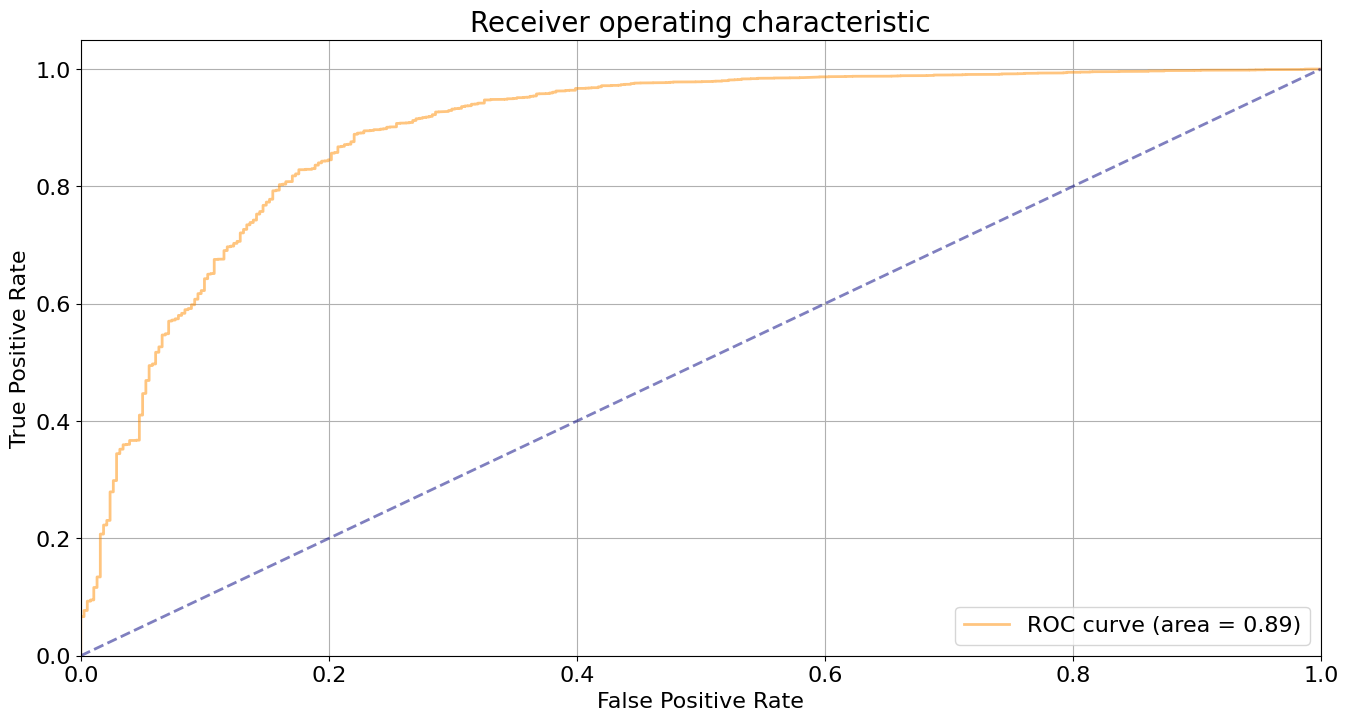

In [57]:
#Using utils to make the pattern easier
from catboost.utils import get_roc_curve
import sklearn
from sklearn import metrics

eval_pool = Pool(X_validation, y_validation, cat_features=cat_features)
curve = get_roc_curve(model, eval_pool)
(fpr, tpr, thresholds) = curve
roc_auc = sklearn.metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
lw = 2

plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc, alpha=0.5)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', alpha=0.5)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver operating characteristic', fontsize=20)
plt.legend(loc="lower right", fontsize=16)
plt.show()

The above graph illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

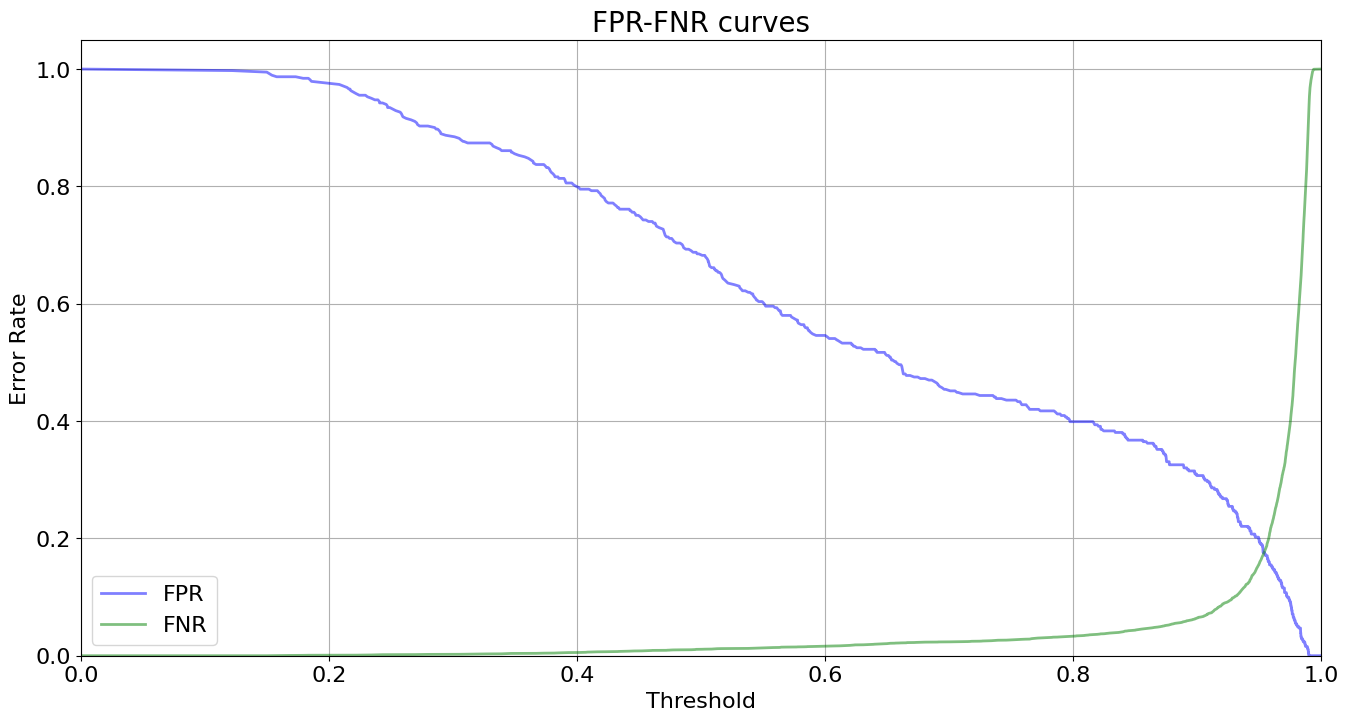

In [58]:
from catboost.utils import get_fpr_curve
from catboost.utils import get_fnr_curve

(thresholds, fpr) = get_fpr_curve(curve=curve)
(thresholds, fnr) = get_fnr_curve(curve=curve)

plt.figure(figsize=(16, 8))
lw = 2

plt.plot(thresholds, fpr, color='blue', lw=lw, label='FPR', alpha=0.5)
plt.plot(thresholds, fnr, color='green', lw=lw, label='FNR', alpha=0.5)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.xlabel('Threshold', fontsize=16)
plt.ylabel('Error Rate', fontsize=16)
plt.title('FPR-FNR curves', fontsize=20)
plt.legend(loc="lower left", fontsize=16)
plt.show()

The above graph displays the FPR-FNR curves for error rate and threshold.

In [59]:
from catboost.utils import select_threshold

print(select_threshold(model=model, data=eval_pool, FNR=0.01))
print(select_threshold(model=model, data=eval_pool, FPR=0.01))

0.4803474528996477
0.9899643475743053


#### <b> Snapshotting </b>

Catboost supports snapshotting. You can use it to recover training after an interruption or start training with previous results.

In [60]:
#!rm 'catboost_info/snapshot.bkp'
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=100,
    save_snapshot=True,
    snapshot_file='snapshot.bkp',
    snapshot_interval=1,
    random_seed=43
)
model.fit(
    X_train, y_train,
    eval_set=(X_validation, y_validation),
    cat_features=cat_features,
    verbose=True
)

Learning rate set to 0.193326
0:	learn: 0.5565905	test: 0.5566217	best: 0.5566217 (0)	total: 26.2ms	remaining: 2.59s
1:	learn: 0.4642626	test: 0.4639935	best: 0.4639935 (1)	total: 40.1ms	remaining: 1.96s
2:	learn: 0.3989148	test: 0.3981304	best: 0.3981304 (2)	total: 59.6ms	remaining: 1.93s
3:	learn: 0.3516186	test: 0.3510286	best: 0.3510286 (3)	total: 65.1ms	remaining: 1.56s
4:	learn: 0.3164302	test: 0.3161297	best: 0.3161297 (4)	total: 78.3ms	remaining: 1.49s
5:	learn: 0.2906047	test: 0.2905494	best: 0.2905494 (5)	total: 82.5ms	remaining: 1.29s
6:	learn: 0.2710475	test: 0.2708899	best: 0.2708899 (6)	total: 90.8ms	remaining: 1.21s
7:	learn: 0.2538458	test: 0.2539798	best: 0.2539798 (7)	total: 106ms	remaining: 1.22s
8:	learn: 0.2399269	test: 0.2401350	best: 0.2401350 (8)	total: 115ms	remaining: 1.17s
9:	learn: 0.2298664	test: 0.2304173	best: 0.2304173 (9)	total: 122ms	remaining: 1.1s
10:	learn: 0.2180381	test: 0.2161946	best: 0.2161946 (10)	total: 133ms	remaining: 1.07s
11:	learn: 0.208

#### <b> Model Predictions </b>

predict_proba gives you the probabilities for the target in array form. The number of probabilities for each row is equal to the number of categories in the target variable.

In [61]:
print(model.predict_proba(X=X_validation))

[[0.0508 0.9492]
 [0.0181 0.9819]
 [0.0179 0.9821]
 ...
 [0.0161 0.9839]
 [0.017  0.983 ]
 [0.0236 0.9764]]


In [62]:
print(model.predict(data=X_validation))

[1 1 1 ... 1 1 1]


In [ ]:
raw_pred = model.predict(
    data=X_validation,
    prediction_type='RawFormulaVal'
)
print(raw_pred)

[2.9282 3.9947 4.0077 ... 4.1115 4.06   3.7207]


In [ ]:
from numpy import exp

#Calculating sigmoid
sigmoid = lambda x: 1 / (1 + exp(-x))

probabilities = sigmoid(raw_pred)

print(probabilities)

[0.9492 0.9819 0.9821 ... 0.9839 0.983  0.9764]


The probabilities will be displayed on the screen.

In [ ]:
X_prepared = X_validation.values.astype(str).astype(object)
#For FeaturesData class categorial features must have type str

fast_predictions = model.predict_proba(
    X=FeaturesData(
        cat_feature_data=X_prepared,
        cat_feature_names=list(X_validation)
    )
)
print(fast_predictions)

[[0.0508 0.9492]
 [0.0181 0.9819]
 [0.0179 0.9821]
 ...
 [0.0161 0.9839]
 [0.017  0.983 ]
 [0.0236 0.9764]]


#### <b> Staged Prediction </b>

CatBoost allows to apply a trained model and calculate the results for each i-th tree of the model, taking into consideration only the trees in the range [0; i).

In [63]:
predictions_gen = model.staged_predict_proba(
    data=X_validation,
    ntree_start=0, 
    ntree_end=5, 
    eval_period=1
)
print(predictions_gen)
try:
    for iteration, predictions in enumerate(predictions_gen):
        print('Iteration ' + str(iteration) + ', predictions:')
        print(predictions)
except Exception:
    pass

<generator object CatBoost._staged_predict at 0x133f7d770>
Iteration 0, predictions:
[[0.4154 0.5846]
 [0.4154 0.5846]
 [0.4154 0.5846]
 ...
 [0.4154 0.5846]
 [0.4154 0.5846]
 [0.4154 0.5846]]
Iteration 1, predictions:
[[0.3476 0.6524]
 [0.3476 0.6524]
 [0.3476 0.6524]
 ...
 [0.3476 0.6524]
 [0.3476 0.6524]
 [0.3476 0.6524]]
Iteration 2, predictions:
[[0.292  0.708 ]
 [0.292  0.708 ]
 [0.2978 0.7022]
 ...
 [0.2978 0.7022]
 [0.292  0.708 ]
 [0.2978 0.7022]]
Iteration 3, predictions:
[[0.2485 0.7515]
 [0.2485 0.7515]
 [0.2538 0.7462]
 ...
 [0.2538 0.7462]
 [0.2485 0.7515]
 [0.2538 0.7462]]
Iteration 4, predictions:
[[0.2126 0.7874]
 [0.2126 0.7874]
 [0.2173 0.7827]
 ...
 [0.2173 0.7827]
 [0.2126 0.7874]
 [0.2173 0.7827]]


#### <b> Solving Multiclass Classification Problem </b>

Let us solve the **Multiclass Classification Problem** using the **CatBoostClassifier.**

In [64]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=50,
    random_seed=43,
    loss_function='MultiClass'
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    verbose=False,
#     plot=True
)

For multiclass problems with many classes, sometimes, it's better to solve classification problems using ranking. To do that, we will build a dataset with groups. Every group will represent one object from our initial dataset. But it will have one additional categorical feature, a possible class value. Target values will be equal to 1 if the class value is equal to the correct class and 0 otherwise. Thus, each group will have exactly one 1 in labels and some zeros. You can put all possible class values in the group, or you can try setting only hard negatives if there are too many labels. We'll show this approach as an example of a binary classification problem.

In [65]:
#Defining custom function to build multiclass ranking
from copy import deepcopy
def build_multiclass_ranking_dataset(X, y, cat_features, label_values=[0,1], start_group_id=0):
    ranking_matrix = []
    ranking_labels = []
    group_ids = []

    X_train_matrix = X.values
    y_train_vector = y.values

    for obj_idx in range(X.shape[0]):
        obj = list(X_train_matrix[obj_idx])

        for label in label_values:
            obj_of_given_class = deepcopy(obj)
            obj_of_given_class.append(label)
            ranking_matrix.append(obj_of_given_class)
            ranking_labels.append(float(y_train_vector[obj_idx] == label)) 
            group_ids.append(start_group_id + obj_idx)
        
    final_cat_features = deepcopy(cat_features)
    final_cat_features.append(X.shape[1]) # new feature that we are adding should be categorical.
    return Pool(ranking_matrix, ranking_labels, cat_features=final_cat_features, group_id = group_ids)

In [67]:
from catboost import CatBoost
params = {'iterations':150, 'learning_rate':0.01, 'l2_leaf_reg':30, 'random_seed':0, 'loss_function':'QuerySoftMax'}

groupwise_train_pool = build_multiclass_ranking_dataset(X_train, y_train, cat_features, [0,1])
groupwise_eval_pool = build_multiclass_ranking_dataset(X_validation, y_validation, cat_features, [0,1], X_train.shape[0])

model = CatBoost(params)
model.fit(
    X=groupwise_train_pool,
    verbose=False,
    eval_set=groupwise_eval_pool,
#     plot=True
)

Making predictions with ranking mode

In [68]:
import math

obj = list(X_validation.values[0])
ratings = []
for label in [0,1]:
    obj_with_label = deepcopy(obj)
    obj_with_label.append(label)
    rating = model.predict([obj_with_label])[0]
    ratings.append(rating)
print('Raw values:', np.array(ratings))

def soft_max(values):
    return [math.exp(val) / sum([math.exp(val) for val in values]) for val in values]

print('Probabilities', np.array(soft_max(ratings)))

Raw values: [-0.471   0.4713]
Probabilities [0.2804 0.7196]


#### <b> Metric Evaluation on a New Dataset </b>

Let us perform **Metric Evaluation** on a new dataset using the training data.

In [69]:
model = CatBoostClassifier(
    random_seed=63,
    iterations=200,
    learning_rate=0.03,
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    verbose=50
)

0:	learn: 0.6569860	total: 40.6ms	remaining: 8.08s
50:	learn: 0.1907871	total: 1.04s	remaining: 3.03s
100:	learn: 0.1645125	total: 2s	remaining: 1.96s
150:	learn: 0.1565519	total: 3.02s	remaining: 981ms
199:	learn: 0.1533854	total: 4.06s	remaining: 0us


In [70]:
metrics = model.eval_metrics(
    data=pool1,
    metrics=['Logloss','AUC'],
    ntree_start=0,
    ntree_end=0,
    eval_period=1,
#     plot=True
)

In [71]:
print('AUC values:')
print(np.array(metrics['AUC']))

AUC values:
[0.4998 0.538  0.5504 0.5888 0.6536 0.6515 0.6476 0.648  0.7117 0.731
 0.7277 0.7278 0.7299 0.7298 0.7275 0.7273 0.7336 0.735  0.7445 0.7606
 0.7627 0.7627 0.7715 0.7699 0.7773 0.7824 0.7859 0.8067 0.818  0.846
 0.8607 0.8651 0.874  0.8745 0.8797 0.8794 0.8964 0.8969 0.9042 0.9129
 0.9154 0.916  0.9175 0.9197 0.9245 0.9253 0.9301 0.9298 0.9305 0.931
 0.9316 0.9332 0.9333 0.9356 0.9361 0.938  0.9393 0.9392 0.9395 0.941
 0.9417 0.9431 0.9433 0.9436 0.944  0.9452 0.9458 0.9458 0.9479 0.9492
 0.9503 0.9509 0.9517 0.9527 0.9537 0.9541 0.955  0.9556 0.9559 0.9564
 0.9574 0.958  0.9591 0.9598 0.9602 0.9606 0.961  0.9615 0.9621 0.9625
 0.9629 0.9635 0.9641 0.9644 0.9646 0.965  0.9654 0.9657 0.9659 0.966
 0.9662 0.9666 0.9668 0.9669 0.9673 0.9675 0.9677 0.9678 0.9679 0.9679
 0.9681 0.9682 0.9682 0.9683 0.9684 0.9685 0.9686 0.9687 0.9687 0.9688
 0.9688 0.9689 0.9689 0.9691 0.9692 0.9693 0.9693 0.9694 0.9694 0.9693
 0.9694 0.9699 0.9704 0.9708 0.9712 0.9716 0.972  0.9721 0.9724 0.9724

#### <b> Feature Importances </b>

<b> Feature importance </b> refers to techniques that assign a score to input features based on how useful they are at predicting a target variable.

In [72]:
#To find feature importance
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,RESOURCE,22.311819
1,MGR_ID,18.121045
2,ROLE_DEPTNAME,14.891573
3,ROLE_ROLLUP_2,12.310360
4,ROLE_CODE,10.388989
5,ROLE_FAMILY_DESC,9.144182
6,ROLE_TITLE,6.402628
7,ROLE_FAMILY,4.649123
8,ROLE_ROLLUP_1,1.780282


Scores are assigned to the input features.

#### <b> Feature Evaluation </b>

Let us perform feature evaluation using the **eval_features( )** function.

In [73]:
from catboost.eval.catboost_evaluation import *
learn_params = {'iterations': 20, # 2000
                'learning_rate': 0.5, #we set big learning_rate, because we have small iterations
                'random_seed': 0,
                'verbose': False,
                'loss_function' : 'Logloss',
                'boosting_type': 'Plain'}
evaluator = CatboostEvaluation('amazon/train.tsv',
                               fold_size=10000, #<= 50% of dataset
                               fold_count=20,
                               column_description='amazon/train.cd',
                               partition_random_seed=0,
                               #working_dir=... 
)
result = evaluator.eval_features(learn_config=learn_params,
                                 eval_metrics=['Logloss', 'Accuracy'],
                                 features_to_eval=[6, 7, 8])

from catboost.eval.evaluation_result import *
logloss_result = result.get_metric_results('Logloss')
logloss_result.get_baseline_comparison(
    ScoreConfig(ScoreType.Rel, overfit_iterations_info=False)
)

/usr/local/lib/python3.10/site-packages/catboost/eval/evaluation_result.py:93: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._fold_metric = pd.Series()
/usr/local/lib/python3.10/site-packages/catboost/eval/evaluation_result.py:94: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._fold_metric_iteration = pd.Series()
/usr/local/lib/python3.10/site-packages/catboost/eval/evaluation_result.py:93: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._fold_metric = pd.Series()
/usr/local/lib/python3.10/site-packages/catboost/eval/evaluation_result.py:94: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' i

,PValue,Score,Quantile 0.005,Quantile 0.995,Decision
Features: 6,0.000189,1.010962,0.604661,1.466826,GOOD
Features: 7,0.681322,-0.033237,-0.331671,0.328593,UNKNOWN
Features: 8,0.005111,-0.439271,-0.780469,-0.083621,BAD


#### <b> Saving the Model </b>

In [74]:
my_best_model = CatBoostClassifier(iterations=10)
my_best_model.fit(
    X_train, y_train,
    eval_set=(X_validation, y_validation),
    cat_features=cat_features,
    verbose=False
)
my_best_model.save_model('catboost_model.bin')
my_best_model.save_model('catboost_model.json', format='json')

In [75]:
my_best_model.load_model('catboost_model.bin')
print(my_best_model.get_params())
print(my_best_model.random_seed_)

{'iterations': 10, 'loss_function': 'Logloss', 'verbose': 0}
0


### **Hyperparameter Tunning**

Hyperparameter tuning is the process of determining the right combination of hyperparameters that allows the model to maximize model performance. Setting the correct combination of hyperparameters is the only way to extract the maximum performance out of models.

#### <b> Training Speed </b>

In [77]:
from catboost import CatBoost
fast_model = CatBoostClassifier(
    random_seed=63,
    iterations=150,
    learning_rate=0.01,
    boosting_type='Plain',
    bootstrap_type='Bernoulli',
    subsample=0.5,
    one_hot_max_size=20,
    rsm=0.5,
    leaf_estimation_iterations=5,
    max_ctr_complexity=1)

fast_model.fit(
    X_train, y_train,
    cat_features=cat_features,
    verbose=False,
#     plot=True
)

#### <b> Accuracy </b>

In [78]:
tunned_model = CatBoostClassifier(
    random_seed=63,
    iterations=1000,
    learning_rate=0.03,
    l2_leaf_reg=3,
    bagging_temperature=1,
    random_strength=1,
    one_hot_max_size=2,
    leaf_estimation_method='Newton'
)
tunned_model.fit(
    X_train, y_train,
    cat_features=cat_features,
    verbose=False,
    eval_set=(X_validation, y_validation),
#     plot=True
)

#### <b> Training the Model after Parameter Tuning </b>

In [79]:
best_model = CatBoostClassifier(
    random_seed=63,
    iterations=int(tunned_model.tree_count_ * 1.2),
)
best_model.fit(
    X, y,
    cat_features=cat_features,
    verbose=100
)

Learning rate set to 0.040343
0:	learn: 0.6456466	total: 12.8ms	remaining: 14.6s
100:	learn: 0.1534434	total: 2.42s	remaining: 25.1s
200:	learn: 0.1466718	total: 4.79s	remaining: 22.5s
300:	learn: 0.1430361	total: 7.32s	remaining: 20.5s
400:	learn: 0.1399976	total: 9.73s	remaining: 18.1s
500:	learn: 0.1372704	total: 12.6s	remaining: 16.2s
600:	learn: 0.1341051	total: 15.3s	remaining: 13.9s
700:	learn: 0.1313257	total: 19s	remaining: 12s
800:	learn: 0.1285775	total: 21.5s	remaining: 9.24s
900:	learn: 0.1263064	total: 24.1s	remaining: 6.56s
1000:	learn: 0.1238298	total: 26.7s	remaining: 3.87s
1100:	learn: 0.1212612	total: 29.2s	remaining: 1.2s
1145:	learn: 0.1200895	total: 30.5s	remaining: 0us


#### <b> Calculate Prediction </b>

In [80]:
#Let us calculate contest predictions
X_test = test_df.drop('id', axis=1)
test_pool = Pool(data=X_test, cat_features=cat_features)
contest_predictions = best_model.predict_proba(test_pool)
print('Predictions:')
print(contest_predictions)

Predictions:
[[0.4509 0.5491]
 [0.0131 0.9869]
 [0.0118 0.9882]
 ...
 [0.0053 0.9947]
 [0.04   0.96  ]
 [0.0118 0.9882]]


### <b>Voting Ensemble</b>

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the submodels when asked to make predictions for new data.

The predictions of the submodels can be weighted, but specifying the weights for classifiers manually or even heuristically is difficult. More advanced methods can learn how to best weight the predictions from submodels, but this is called stacking (stacked generalization) and is currently not provided in scikit-learn.

You can create a voting ensemble model for classification using the **VotingClassifier** class.

The code below provides an example of combining the predictions of logistic regression, classification, and regression trees and support vector machines together for a classification problem.


In [83]:
#Voting Ensemble for Classification
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)

array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
seed = 7
kfold = model_selection.KFold(n_splits=10)

#Create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))
print(estimators)

#Create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X, Y, cv=kfold)
print(results)
print(results.mean())

[('logistic', LogisticRegression()), ('cart', DecisionTreeClassifier()), ('svm', SVC())]


/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[0.6494 0.8052 0.7143 0.6623 0.7792 0.8052 0.8442 0.8442 0.7368 0.7632]
0.7603896103896104


/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

**Note: In this lesson, we saw the use of the ensemble learning methods, and in the next lesson, we will be working on Recommender Systems.**

![Simplilearn_Logo](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Logo_Powered_By_Simplilearn/SL_Logo_1.png)